In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
cust_acq=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\Customer Acqusition.csv')
cust_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [3]:
cust_acq=cust_acq.drop(columns='No') #dropping No column
cust_acq


,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [4]:
spend_data=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\spend.csv')
spend_data


,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [5]:
spend_data=spend_data.drop(columns='Sl No:') #dropping sl.no column
spend_data

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...
1495,A67,4-Feb-06,BUS TICKET,356872.73
1496,A68,25-Mar-06,BUS TICKET,204971.10
1497,A69,31-Mar-06,BUS TICKET,50449.44
1498,A70,23-Mar-06,BUS TICKET,80593.94


In [6]:
repayment=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\Repayment.csv')
repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [7]:
repayment=repayment.drop(columns=['Unnamed: 4','SL No:']) #dropping unamed and sl no column
repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1518,NaN,NaN,NaN
1519,NaN,NaN,NaN
1520,NaN,NaN,NaN
1521,NaN,NaN,NaN


In [8]:
#converting Month column as object to datetime both in repayement and spend_data
repayment['Month']=repayment['Month'].apply(lambda x:pd.to_datetime(x))
repayment

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88
...,...,...,...
1518,NaN,NaT,NaN
1519,NaN,NaT,NaN
1520,NaN,NaT,NaN
1521,NaN,NaT,NaN


In [9]:
spend_data['Month']=spend_data['Month'].apply(lambda x:pd.to_datetime(x))
spend_data

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73
1496,A68,2006-03-25,BUS TICKET,204971.10
1497,A69,2006-03-31,BUS TICKET,50449.44
1498,A70,2006-03-23,BUS TICKET,80593.94


In [10]:
#1a
cust_acq.loc[cust_acq['Age']<18,'Age']=cust_acq['Age'].mean()
cust_acq

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [11]:
#1b
data=pd.merge(left=cust_acq,right=spend_data,how='inner',left_on='Customer',right_on='Customer')
data

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [12]:
data.loc[data['Amount']>data['Limit'],'Amount']=data['Limit']/2
data


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00


In [13]:
#1c
data1=pd.merge(left=cust_acq,right=repayment,how='inner',left_on='Customer',right_on='Customer')
data1

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73


In [14]:
data1.loc[data1['Amount']>data1['Limit'],'Amount']=data1['Limit']
data1

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


In [15]:
#2a
len(cust_acq['Customer'].unique())

100

In [16]:
#2b
len(cust_acq['Product'].unique())

3

In [17]:
#2c  SPEND_DATA
monthly_avg_spent=spend_data.groupby(by=['Month','Customer'])[['Amount']].mean().reset_index()
monthly_avg_spent['Month']=monthly_avg_spent['Month'].apply(lambda x:x.month)
montly_avg_spent=monthly_avg_spent.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
monthly_avg_spent



,Month,Customer,Amount
0,1,A1,410556.130
1,1,A12,270283.575
2,1,A13,301067.125
3,1,A16,196642.890
4,1,A17,11938.810
...,...,...,...
1252,12,A44,313591.170
1253,12,A51,338487.580
1254,12,A56,223628.270
1255,12,A58,167643.950


In [18]:
#2d  REPAYMENT
Monthly_avg_spent=repayment.groupby(by=['Month','Customer'])[['Amount']].mean().reset_index()
Monthly_avg_spent['Month']=Monthly_avg_spent['Month'].apply(lambda x:x.month)
Montly_avg_spent=Monthly_avg_spent.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
Monthly_avg_spent

,Month,Customer,Amount
0,1,A1,245899.020
1,1,A10,241615.375
2,1,A13,396192.950
3,1,A14,307424.130
4,1,A16,262142.780
...,...,...,...
1276,12,A40,169786.150
1277,12,A49,60465.210
1278,12,A56,162103.090
1279,12,A57,194338.110


In [19]:
#2e
avg_monthly_cust=pd.merge(left=monthly_avg_spent,right=Monthly_avg_spent,how='inner',left_on=['Month','Customer'],right_on=['Month','Customer'])
avg_monthly_cust['Monthly_Profit']=avg_monthly_cust.Amount_x-avg_monthly_cust.Amount_y
avg_monthly_cust['Profit']=np.where(avg_monthly_cust['Monthly_Profit']>0,avg_monthly_cust['Monthly_Profit']*2.9/100,np.nan)
avg_monthly_cust

,Month,Customer,Amount_x,Amount_y,Monthly_Profit,Profit
0,1,A1,410556.13,245899.020,164657.110,4775.05619
1,1,A1,410556.13,422930.785,-12374.655,NaN
2,1,A1,410556.13,356258.850,54297.280,1574.62112
3,1,A1,410556.13,437555.120,-26998.990,NaN
4,1,A1,410556.13,165972.880,244583.250,7092.91425
...,...,...,...,...,...,...
3361,12,A21,452425.82,489260.280,-36834.460,NaN
3362,12,A36,226412.38,146321.260,80091.120,2322.64248
3363,12,A44,313591.17,79696.210,233894.960,6782.95384
3364,12,A56,223628.27,162103.090,61525.180,1784.23022


In [20]:
#2f
top_prod_types=spend_data.groupby(by='Type')[['Amount']].sum()
top_prod_types.sort_values('Amount',ascending=False).iloc[:5,:]

,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


In [21]:
#2g
max_city_spent=data.groupby(by='City')[['Amount']].sum()
max_city_spent.sort_values('Amount',ascending=False).iloc[:1,:]



,Amount
City,
COCHIN,45963513.5


In [26]:
#2h
#from age getting age group using np.where condition
data['Age_Group']=np.where(((data.Age.astype(int) >= 18) & (data.Age.astype(int) < 25)), 'Youth',np.where(((data.Age.astype(int) >= 25) & (data.Age.astype(int) < 65)), 'Adult','Senior'))
data.groupby('Age_Group')[['Amount']].sum().sort_values(by='Amount',ascending=False)


,Amount
Age_Group,
Adult,1.674181e+08
Senior,3.768249e+07
Youth,1.468050e+07


In [27]:
#2i
top_cust=repayment.groupby(by='Customer')[['Amount']].sum()
top_cust.sort_values('Amount',ascending=False).iloc[:10,:]

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


In [28]:
#3
data['Year']=data['Month'].apply(lambda x:x.year)
yearly_basis=pd.pivot_table(data=data,index='City',columns=['Year','Product'],values='Amount',aggfunc='sum')
yearly_basis

Year              2004                                 2005              \
Product           Gold    Platimum      Silver         Gold    Platimum   
City                                                                      
BANGALORE   9289878.54  1112732.30  1291852.58  12892362.99   912284.97   
BOMBAY      6987853.53   897264.94   532089.03   8983018.28   711804.94   
CALCUTTA    7477140.98  2037690.30   500006.00  10303355.80  4434696.31   
CHENNAI     1059618.50  3535652.38   282056.86   3740945.58  5053956.32   
COCHIN      7315850.15  3419904.07   814229.62  12110613.03  4960921.71   
DELHI       2806495.00   283512.89   768172.30   1964845.27   494157.86   
PATNA       2072567.90  1113069.60   756684.10   3252615.77  2883231.07   
TRIVANDRUM  2415102.84  2161676.67   209667.48   1240375.85  3601443.30   

Year                          2006                          
Product        Silver         Gold    Platimum      Silver  
City                                                        
BANGALORE   830612.34  12030611.09   685831.27  1415480.94  
BOMBAY      508988.54   7917144.31   972130.01  1092833.80  
CALCUTTA    440147.06  11167532.77  3589606.66  1157956.42  
CHENNAI     377184.49   2704288.62  5024923.40   350009.50  
COCHIN      652269.38  10499142.38  4920592.29  1269990.87  
DELHI       612311.21   2957103.32   176788.72   854899.97  
PATNA       950094.19   2276181.69  1256137.65   700005.00  
TRIVANDRUM  269912.99   2735710.87  2147403.75   555862.12

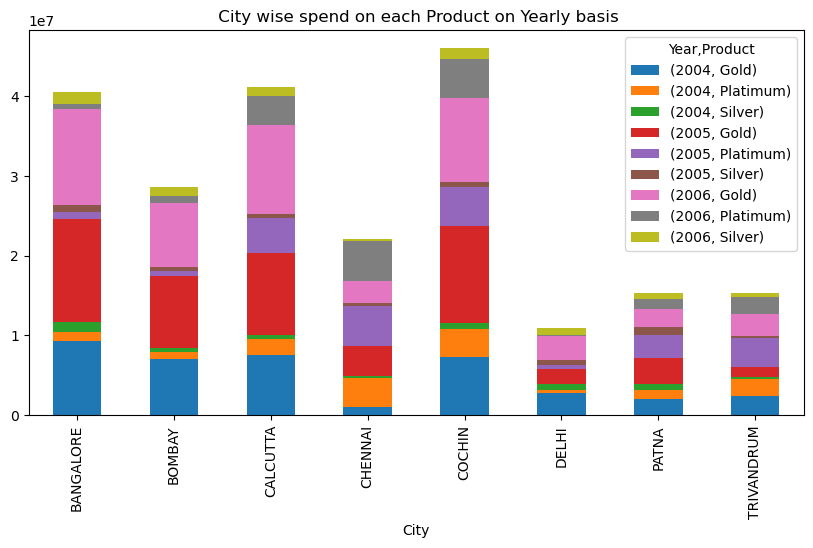

In [36]:
yearly_basis.plot(kind='bar',stacked=True,figsize=[10,5],title=' City wise spend on each Product on Yearly basis')
plt.show()

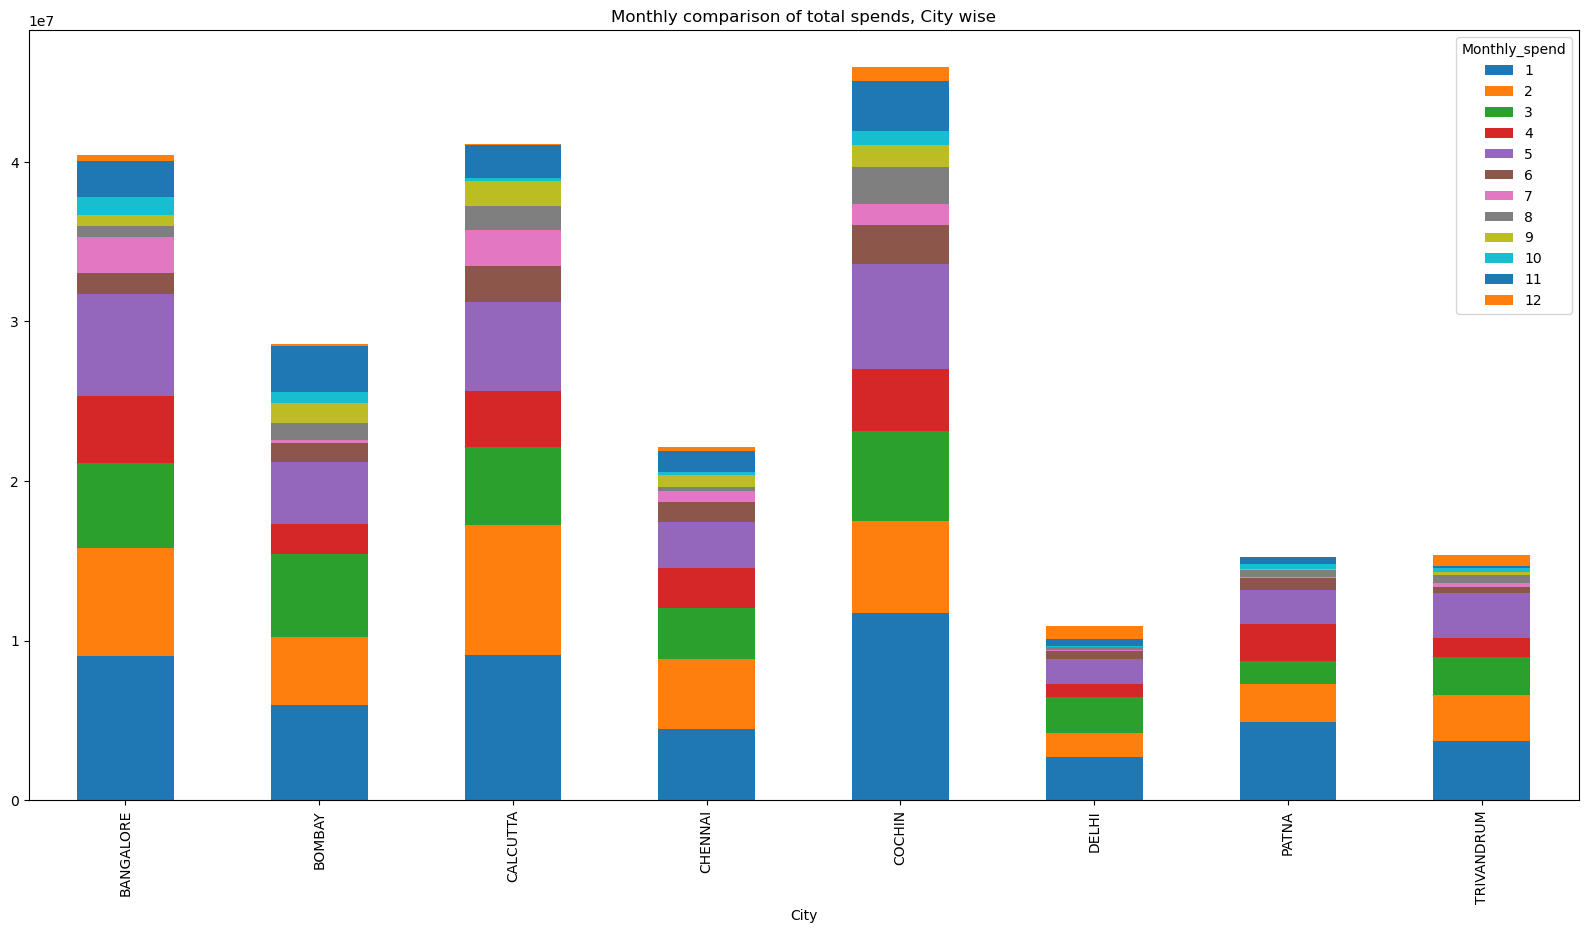

In [37]:
#4a

data['Monthly_spend']=data.Month.apply(lambda x:x.month)
monthly_basis=pd.pivot_table(data=data,index='City',columns='Monthly_spend',values='Amount',aggfunc='sum')
monthly_basis.plot(kind='bar',stacked=True,figsize=[20,10],title='Monthly comparison of total spends, City wise')
plt.show()

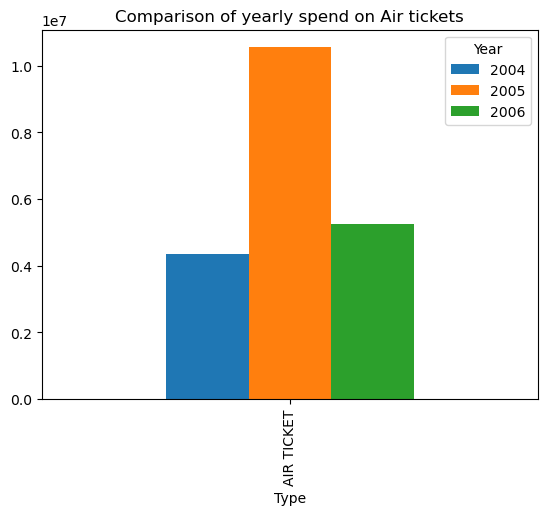

In [38]:
#4b
pd.pivot_table(data=data[data.Type=='AIR TICKET'],index='Type',columns='Year',values='Amount',aggfunc='sum').plot(kind='bar',title='Comparison of yearly spend on Air tickets')
plt.show()

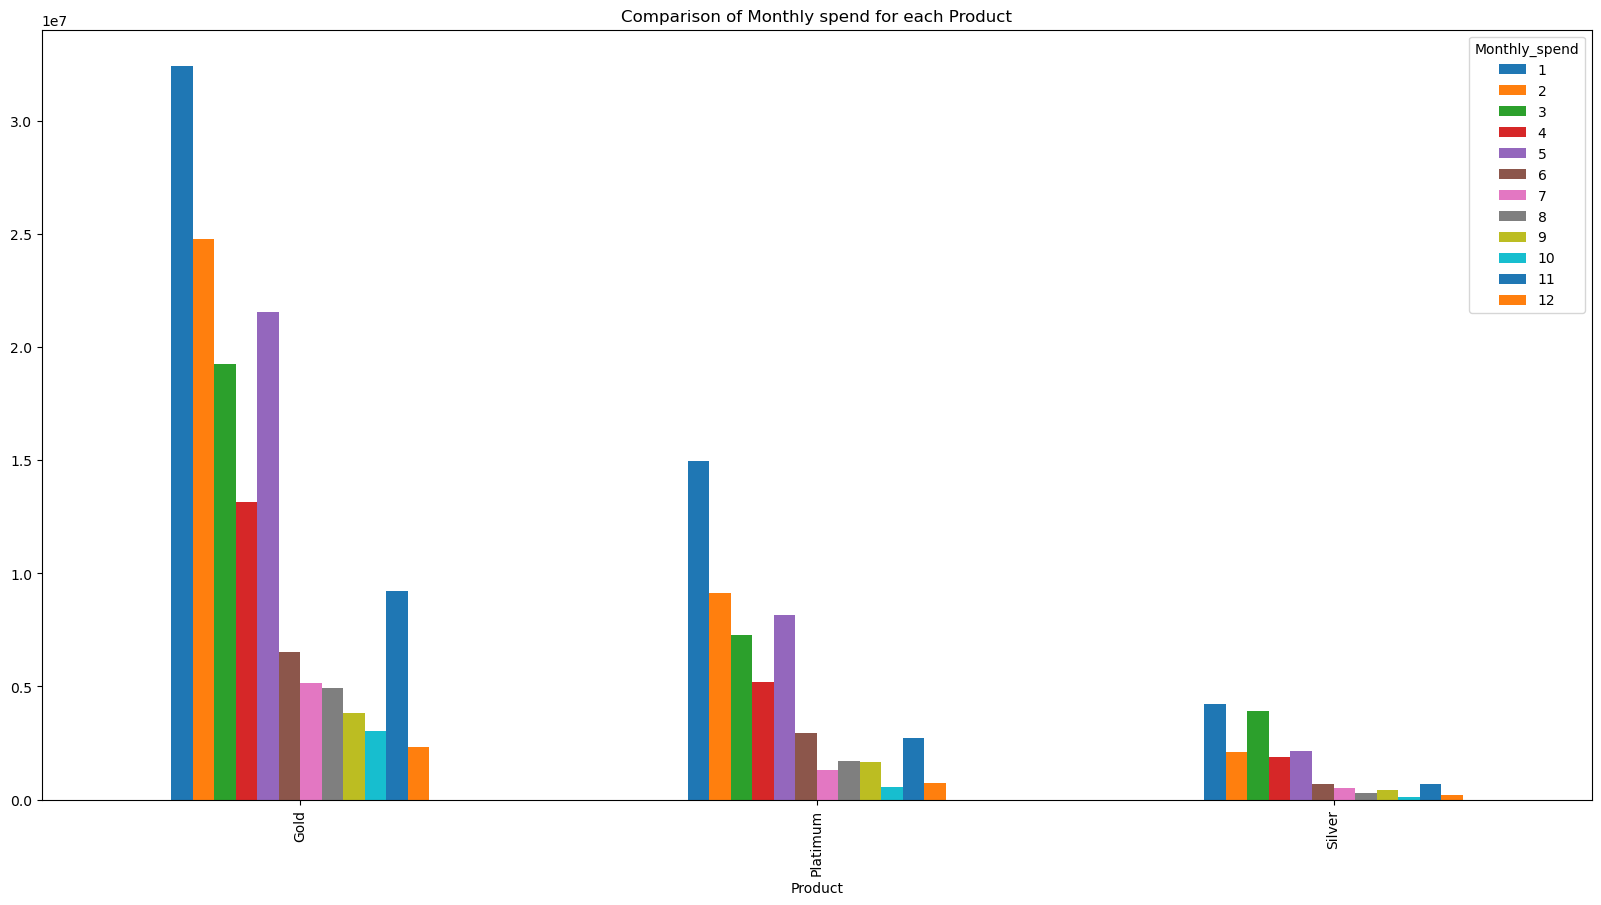

In [39]:
#4c
pd.pivot_table(data=data,index='Product',columns='Monthly_spend',values='Amount',aggfunc='sum').plot(kind='bar',figsize=[20,10],title='Comparison of Monthly spend for each Product')
plt.show()

In [33]:
#5
data1['Month']=data['Month'].apply(lambda x:x.month)
data1['Year']=data['Month'].apply(lambda x:x.year)

In [34]:
time_period=int(input("Please Enter Time Period and Time Period should be in year/month: "))
product_category=str(input("Please Enter Product Category and Product Category should be in Gold/Silver and Platinum: "))
    
def top10customers(product_category,time_period):
    
    
    return data1.loc[(data1['Product']==product_category) &((data1.Month==time_period)|(data1.Year==time_period))].groupby(['City','Product','Month','Year'])['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False).head(10)

    

Please Enter Time Period and Time Period should be in year/month: 2005
Please Enter Product Category and Product Category should be in Gold/Silver and Platinum: Gold


In [35]:
top10customers('Gold',2005)

,City,Product,Month,Year,Amount
1,BANGALORE,Gold,2,2005,7611647.48
32,COCHIN,Gold,2,2005,4124756.85
19,CALCUTTA,Gold,2,2005,4010407.23
3,BANGALORE,Gold,5,2005,3861723.72
14,BOMBAY,Gold,5,2005,2701705.61
12,BOMBAY,Gold,2,2005,2480456.64
34,COCHIN,Gold,5,2005,2167349.53
21,CALCUTTA,Gold,5,2005,1730544.09
27,CHENNAI,Gold,2,2005,1375877.04
9,BANGALORE,Gold,11,2005,1283908.92
